In [249]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import  matplotlib
web=pd.read_parquet('navegacion_web.pq', engine='pyarrow')

In [251]:
web = pd.read_parquet('navegacion_web.pq', engine='pyarrow')
web.head()

,user_id,device_id,session_id,device_model,min_session_time,total_previous_sessions,total_previous_events,date_short,total_previous_vipphoto_selected,total_previous_vip360view_selected,...,region,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev,stock_id,date,user_with_reserve,reserved,avg_time_previous_sessions
51760,9015447,yWOTGT6B-WzQU514Cqx1gL,1644253316189,Android,2022-02-07 17:01:56.223,1,1,2022-01-01 00:11:51.858,0,0,...,Mexico City,0.0,0,0,1,NaN,NaT,0.0,0.0,0.0
14885,8820027,LP42_fstvBPogWjh_1bkCg,1642913715699,Android,2022-01-23 04:55:17.124,1,9,2022-01-01 00:17:23.169,0,0,...,Mexico City,286.0,1,1,2,NaN,NaT,0.0,0.0,143.0
3992,5510567,AKERRpRODjl02b39AjfNb8,1642459615372,Android,2022-01-17 22:46:55.395,1,1,2022-01-01 00:22:28.720,0,0,...,Mexico City,0.0,0,0,1,NaN,NaT,0.0,0.0,0.0
131349,8665203,SxeKxvgE3mkec-e21Ej-bm,1647229337062,Android,2022-03-14 03:42:17.095,1,9,2022-01-01 00:27:00.994,0,0,...,Mexico City,379.0,1,1,2,NaN,NaT,0.0,0.0,189.5
25970,8409083,CttzrxBwYiDT93zwK93Xmt,1643398529809,Android,2022-01-28 19:35:32.308,1,1,2022-01-01 00:28:48.352,0,0,...,México,0.0,0,0,1,NaN,NaT,0.0,0.0,0.0


# Glosario



**user_id**=id del usuario
**device_id**= id del dispositivo
**min_session_time** = fecha de la primera sesión
**total_sessions_prev**= numero de sesion
**total_previous_events**= cantidad de eventos en esta sesión
**date_short**= descartada
    **total_previous_vipphoto_selected**=filtro del auto(evento)
    **total_previous_catalogfilter_selected**= filtro del auto (evento)
    **total_previous_vip_viewed**=filtro del auto (evento)
    **total_previous_cataloglist_viewed**=filtro del auto (evento)
    **total_previous_year_selected**=filtro del auto (evento)
    **-total_previous_make_selected**=filtro del auto (evento)
    **total_previous_model_selected**=filtro del auto (evento)
    **total_previous_version_selected**=filtro del auto (evento)
    **total_previous_mileage_selected**=filtro del auto (evento)
    **total_previous_location_selected**=filtro del auto (evento)
    **total_previous_color_selected**=filtro del auto (evento)
**all_total_sessions_prev** cantidad de sesiones acumulados
**total_previous_sessions** cantidad de sesiones acumuladas
**all_total_previous_sessions**
**stock_id**= id del sutp reservado
**date**= fecha de reserva
**user_with_reserve** = si reservo o no
**reserved** = si reservo o no
**avg_time_previous_sessions** = tiempo promedio en la pagina , medido en segundos
**city**= cuidad de mexico
**region**=  region de mexico
**time_on_screen_prev**=  durecion en segundos de la sesion
La columna total events muestra el total de todos los eventos de la session, los cuales no se muestran todos en este dataset.


#Transformación de datos

In [252]:
print(f" El dataset muestra la actividad de los usuarios en la pagina web de KAVAK.Cuenta con  {web.shape[0]} sessiones en la web y {web.shape[1]} columnas que describen las acciones de dichos usuarios ")

 El dataset muestra la actividad de los usuarios en la pagina web de KAVAK.Cuenta con  214160 sessiones en la web y 32 columnas que describen las acciones de dichos usuarios 


In [253]:
web.dtypes

user_id                                           int64
device_id                                        object
session_id                                       object
device_model                                   category
min_session_time                         datetime64[ns]
total_previous_sessions                           int64
total_previous_events                             int64
date_short                               datetime64[ns]
total_previous_vipphoto_selected                  int64
total_previous_vip360view_selected                int64
total_previous_catalogfilter_selected             int64
total_previous_vip_viewed                         int64
total_previous_cataloglist_viewed                 int64
total_previous_home_viewed                        int64
total_previous_year_selected                      int64
total_previous_make_selected                      int64
total_previous_model_selected                     int64
total_previous_version_selected                 

In [254]:
web.device_id.astype(object)
web.user_id.astype(object)

51760     9015447
14885     8820027
3992      5510567
131349    8665203
25970     8409083
           ...   
214144    5557797
214111    6220646
214150    5910763
214142      87114
214156    9742739
Name: user_id, Length: 214160, dtype: object

### Datos Faltantes

In [255]:
def percentageOfnull(df):
    nan_count = df.isna().sum().sort_values(ascending=False)
    nan_percentage = ((df.isna().sum()/df.isna().count())*100).round().sort_values(ascending=False)
    train_test_dtype = df.dtypes
    df_info = pd.concat([nan_count,nan_percentage,train_test_dtype],axis=1,keys=['Null Count','Null Percentage','DataTypes'])
    return df_info[df_info['Null Count']>0]

In [256]:
percentageOfnull(web)

,Null Count,Null Percentage,DataTypes
date,195997,92.0,datetime64[ns]
stock_id,195997,92.0,float64
city,12816,6.0,category


Hay solo 3 columnas con datos nulos.  Las columnas de Date y Stock id tienen la misma cantidad de nulos, ¿Tendran una relación?
La columna de city tiene solo 6% de datos nulos por lo que decido reemplazarla por la moda

In [257]:
web['city'].fillna(web['city'].mode()[0], inplace = True)
web['city'].replace(('None','nan'),web['city'].mode()[0],inplace=True)

In [258]:
date_null=web.date.isna()
stock_id_null= web.stock_id.isna()
web[date_null != stock_id_null]

,user_id,device_id,session_id,device_model,min_session_time,total_previous_sessions,total_previous_events,date_short,total_previous_vipphoto_selected,total_previous_vip360view_selected,...,region,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev,stock_id,date,user_with_reserve,reserved,avg_time_previous_sessions


In [259]:
web.loc[web.reserved==1].isnull().sum()

user_id                                  0
device_id                                0
session_id                               0
device_model                             0
min_session_time                         0
total_previous_sessions                  0
total_previous_events                    0
date_short                               0
total_previous_vipphoto_selected         0
total_previous_vip360view_selected       0
total_previous_catalogfilter_selected    0
total_previous_vip_viewed                0
total_previous_cataloglist_viewed        0
total_previous_home_viewed               0
total_previous_year_selected             0
total_previous_make_selected             0
total_previous_model_selected            0
total_previous_version_selected          0
total_previous_mileage_selected          0
total_previous_location_selected         0
total_previous_color_selected            0
city                                     0
region                                   0
time_on_scr

Los nulos de las columnas date y stock_id son los mismos y coiciden con todos los registros cuya reserva es 0.Por lo cual, podemos asumir que  date es la fecha de reserva y el stock id es el auto que el usuario reservó.

In [260]:
web.loc[(web.user_id==3602521) & ( web.reserved==1),['reserved','stock_id','date']]

,reserved,stock_id,date
18309,1.0,122184.0,2022-02-02
18327,1.0,122184.0,2022-02-02
18661,1.0,122184.0,2022-02-02
18509,1.0,122184.0,2022-02-02
18682,1.0,122184.0,2022-02-02
18813,1.0,122184.0,2022-02-02
19072,1.0,122184.0,2022-02-02
18981,1.0,122184.0,2022-02-02
31635,1.0,122184.0,2022-02-02
31214,1.0,122184.0,2022-02-02


Analizando el usuario 360521, descubrí que reservo en 14 sesiones y 2 autos distintos Ademas, las 14 sesiones suceden dentro de un rango de 2 días. Por lo tanto, estas dos columnas no van a ser tenidas en cuenta para el analisis

In [261]:
web= web.drop(['date','stock_id'],axis=1)

### Ajuste de las columnas

In [262]:
web[web.user_with_reserve!=web.reserved]

,user_id,device_id,session_id,device_model,min_session_time,total_previous_sessions,total_previous_events,date_short,total_previous_vipphoto_selected,total_previous_vip360view_selected,...,total_previous_color_selected,city,region,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev,user_with_reserve,reserved,avg_time_previous_sessions


In [263]:

web=web.drop('user_with_reserve',axis=1)

dado que son iguales, borro una de las dos

In [264]:

def normalize(df):
  df.columns = df.columns.str.replace("_previous","")
normalize(web)
web

,user_id,device_id,session_id,device_model,min_session_time,total_sessions,total_events,date_short,total_vipphoto_selected,total_vip360view_selected,...,total_location_selected,total_color_selected,city,region,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev,reserved,avg_time_sessions
51760,9015447,yWOTGT6B-WzQU514Cqx1gL,1644253316189,Android,2022-02-07 17:01:56.223,1,1,2022-01-01 00:11:51.858,0,0,...,0,0,Mexico City,Mexico City,0.0,0,0,1,0.0,0.000000
14885,8820027,LP42_fstvBPogWjh_1bkCg,1642913715699,Android,2022-01-23 04:55:17.124,1,9,2022-01-01 00:17:23.169,0,0,...,0,0,Iztapalapa,Mexico City,286.0,1,1,2,0.0,143.000000
3992,5510567,AKERRpRODjl02b39AjfNb8,1642459615372,Android,2022-01-17 22:46:55.395,1,1,2022-01-01 00:22:28.720,0,0,...,0,0,Mexico City,Mexico City,0.0,0,0,1,0.0,0.000000
131349,8665203,SxeKxvgE3mkec-e21Ej-bm,1647229337062,Android,2022-03-14 03:42:17.095,1,9,2022-01-01 00:27:00.994,0,0,...,0,0,Mexico City,Mexico City,379.0,1,1,2,0.0,189.500000
25970,8409083,CttzrxBwYiDT93zwK93Xmt,1643398529809,Android,2022-01-28 19:35:32.308,1,1,2022-01-01 00:28:48.352,0,0,...,0,0,Mexico City,México,0.0,0,0,1,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214144,5557797,ITao0pyc-03mus8Rf9JcN5,1651362376439,Android,2022-04-30 23:46:16.457,5,132,2022-04-30 23:15:32.991,0,0,...,0,0,Mexico City,Mexico City,6476.0,3,3,4,0.0,1619.000000
214111,6220646,2e8d803d-822f-400c-9338-99a57ca8de9e,1651361409595,moto g(8) plus,2022-04-30 23:30:09.595,21,145,2022-04-30 23:29:00.824,0,0,...,0,0,Guadalajara,Jalisco,87487.0,18,18,19,0.0,4604.578947
214150,5910763,1869c436-faaf-41ee-aa01-fb7c31b80954,1651362633868,SM-A515F,2022-04-30 23:50:33.868,17,235,2022-04-30 23:42:58.439,0,0,...,0,1,Puebla City,Puebla,48362.0,20,20,17,1.0,2844.823529
214142,87114,2e357941-9c2d-49b3-86a5-0799d80a7913R,1651362348345,SM-A705MN,2022-04-30 23:45:48.345,10,184,2022-04-30 23:45:03.997,0,0,...,3,3,Tizayuca,Hidalgo,5379364.0,19,19,11,0.0,489033.090909


las acciones son de esta sesion y el acumulado,por lo que decidi borrar el "previous" para no confundir

In [265]:
web.city.value_counts(ascending=True)

Carmen Serdan                 0
Texcaltitlan                  0
Cotaxtla                      0
Carmen Primera Seccion        0
Toluquilla                    0
                          ...  
Toluca                     6019
Monterrey                  7230
Puebla City                8041
Guadalajara               12950
Mexico City               76732
Name: city, Length: 1170, dtype: int64

existen cuidades en esta variable que no se encuentran en el dataframe.

In [266]:
web.city.astype(str).value_counts(ascending=True)

Huetamo de Nunez                    1
Constitucion de la Republica        1
Tres Valles                         1
Merced Balbuena                     1
Valle del Tepeyac                   1
                                ...  
Toluca                           6019
Monterrey                        7230
Puebla City                      8041
Guadalajara                     12950
Mexico City                     76732
Name: city, Length: 1146, dtype: int64

In [267]:
web=web.rename(columns={'min_session_time':'session_date'})

Min_short_date es la columna correspondiente a la fecha de la sesion de cada registro

In [268]:
web['mes_sesion']=web['session_date'].dt.month

In [269]:
web.loc[:,['session_date','date_short']]

,session_date,date_short
51760,2022-02-07 17:01:56.223,2022-01-01 00:11:51.858
14885,2022-01-23 04:55:17.124,2022-01-01 00:17:23.169
3992,2022-01-17 22:46:55.395,2022-01-01 00:22:28.720
131349,2022-03-14 03:42:17.095,2022-01-01 00:27:00.994
25970,2022-01-28 19:35:32.308,2022-01-01 00:28:48.352
...,...,...
214144,2022-04-30 23:46:16.457,2022-04-30 23:15:32.991
214111,2022-04-30 23:30:09.595,2022-04-30 23:29:00.824
214150,2022-04-30 23:50:33.868,2022-04-30 23:42:58.439
214142,2022-04-30 23:45:48.345,2022-04-30 23:45:03.997


In [270]:
web=web.drop('date_short',axis=1)

al ser date short anterior a session date, fue borrada.

In [271]:
web=web.rename(columns={'date of reservation':'date'})

Short date es anterior a first_session_date por lo que la descarto.
La columna de date hace referencia a la fecha de reserva-


In [272]:
web = web.rename(columns={'time_on_screen_prev': 'seconds on screen'})
web['muinutes on screen'] = web['seconds on screen'] / 60

In [273]:
web=web.rename(columns={'avg_time_sessions': 'avg seconds on screen'})
web['avg minutes on screen'] = web['avg seconds on screen'] / 60

In [274]:
web=web.drop(['min_total_sessions_prev','all_total_sessions_prev','total_sessions'],axis=1)

Las columnas min_total_sessions_prev,total_sessions_prev , total_sessions y all_total_sessions_prev muestran la cantidad de sesiones previas. Segun sql: dense_rank() over(partition by device_id order by session_id) as total_sessions_prev
Para trabajar, voy a quedarme solo con esta última.

In [275]:
usuarios_con_reserva=web.groupby('user_id').agg(reserved=('reserved','sum'))
usuarios_con_reserva

,reserved
user_id,
104,0.0
136,1.0
137,0.0
166,0.0
201,0.0
...,...
9756022,0.0
9759725,0.0
9776787,0.0


In [276]:
usuarios_con_reserva.value_counts()

reserved
0.0         131221
1.0           5026
2.0           1916
3.0            835
4.0            416
5.0            209
6.0            144
7.0             98
8.0             56
10.0            40
9.0             38
11.0            19
12.0            12
13.0            11
18.0             7
14.0             7
15.0             5
17.0             4
16.0             3
19.0             3
20.0             3
21.0             2
26.0             2
24.0             1
25.0             1
27.0             1
32.0             1
37.0             1
39.0             1
45.0             1
dtype: int64

<AxesSubplot:>

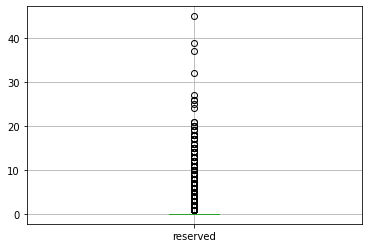

In [277]:
usuarios_con_reserva.boxplot()

# Busqueda de Objetivo

## Relacion entre cantidad de dispositivos y reserva

In [278]:
cantidad_de_dispositivos=web.groupby(web.user_id).agg(devices_used=('device_id','nunique'),reserved=('reserved','sum'))
cantidad_de_dispositivos

,devices_used,reserved
user_id,,
104,1,0.0
136,1,1.0
137,1,0.0
166,1,0.0
201,1,0.0
...,...,...
9756022,1,0.0
9759725,1,0.0
9776787,1,0.0


¿Tiene una relación positiva la cantidad de dispositivos usados y la reserva?¿Será que un usuario que quiere reservar,esta constantemente entrando a la pagina web, desde cualquier dispositivo que tenga cercano?

In [279]:
cantidad_de_dispositivos.devices_used.unique()

array([ 1,  3,  2,  6,  7,  5, 11,  4,  8,  9], dtype=int64)

In [280]:
cantidad_de_dispositivos.loc[cantidad_de_dispositivos.devices_used==11]

,devices_used,reserved
user_id,,
2066,11,0.0
6126706,11,0.0


aca vemos un usuario que ingreso con 11 dispositivos diferentes pero no reservo un auto.

In [281]:
cantidad_de_dispositivos.loc[cantidad_de_dispositivos.devices_used==9]

,devices_used,reserved
user_id,,
4362580,9,0.0


lo mismo sucede con 9

In [282]:
cantidad_de_dispositivos.loc[cantidad_de_dispositivos.reserved>0 ,'devices_used'].describe()

count    8863.000000
mean        1.717477
std         0.904399
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: devices_used, dtype: float64

In [283]:
cantidad_de_dispositivos.loc[cantidad_de_dispositivos.reserved==0 ,'devices_used'].describe()

count    131221.000000
mean          1.104915
std           0.360302
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          11.000000
Name: devices_used, dtype: float64

Podemos ver que la media de dispositivos usados para usuarios que reservaron y para los que no es de 1 dispositivo. Sin embargo, el 75% de los usuarios que reservan usan dos dispositivos , mientras que los usuarios que no reservan, usan uno

¿cuales son los dispositivos mas usados?


In [284]:
web.device_model.value_counts()

Android           127440
iPhone             32580
Windows            29646
Mac                 6428
STK-LX3              610
                   ...  
SM-P580                0
COVET_PRO_LITE         0
M2006C3LI              0
CPH2009                0
iPhone14,6             0
Name: device_model, Length: 776, dtype: int64

In [285]:
web['device_model'] = web['device_model'].apply(lambda x : "Apple" if x.startswith("i")or x == "Mac"\
        else "samsung" if x.startswith("SM")\
        else  "motorola" if x.startswith("moto")
        else  "redmi" if x.startswith("Redmi")
        else "xiaomi" if x.startswith("M") or x.startswith("210")
        else "hauwei" if "-L" in x
        else "oppo"  if x.startswith("CPH")
        else "ZTE"   if x.startswith("ZTE")
        else "LG"    if x.startswith("LM-")
        else x)

In [286]:
devices=web.device_model.value_counts()
others=devices[devices <78].index.to_list()
others

['NTH-NX9',
 'BE2011',
 'VOG-TL00',
 'V2027',
 'LYA-AL00',
 'RMX2170',
 '6125F',
 'BE2029',
 'SHARK PRS-H0',
 'POCOPHONE F1',
 'RMX2111',
 'V2057',
 'RMX3081',
 'RMX2151',
 'RMX2195',
 'JSN-AL00a',
 'RMX2155',
 'BISON',
 'IN2020',
 'LE2120',
 'RMX3203',
 'V2028',
 'Pixel 4',
 'IN2010',
 'ASUS_I005DA',
 'RMX3242',
 'RMX3241',
 'G8141',
 'V2058',
 'T766A',
 'IN2025',
 'Hisense V40',
 'RMX1921',
 'XQ-BC72',
 'KB2000',
 'LE2125',
 'T766J',
 'GM1913',
 'RMX3031',
 'F3213',
 '2201117PG',
 'Nokia G20',
 'G60',
 'TA-1025',
 'BBB100-1',
 'Pixel 3 XL',
 'T671E',
 'Nokia 5.3',
 'LE2121',
 'POCO F2 Pro',
 'H3223',
 'Hisense E50 Lite',
 'T766H',
 'NOH-NX9',
 'Hisense H40',
 'RMX3370',
 'Pixel 6 Pro',
 '2201117TG',
 'C6 2020',
 '5030A',
 'SHARK KLE-H0',
 '5028A',
 '5053A',
 'HLTE103E',
 'HD1925',
 'KB2007',
 'T770B',
 'ASUS_I003DD',
 'VOG-AL10',
 'RMX3363',
 'LYA-AL10',
 'Lenovo TB-J606L',
 'BISON Pro',
 'KB2005',
 'XT1635-02',
 'ELS-N04',
 'Hisense E50',
 'VOG-AL00',
 'ONEPLUS A6003',
 'RMX2063',
 

In [287]:
web['device_model'] = web['device_model'].apply(lambda x : "other" if x in others else x)

In [288]:
web.device_model.value_counts()

Android        127440
Apple           42127
Windows         29646
samsung          4968
xiaomi           2688
motorola         2557
hauwei           1909
other             824
oppo              647
redmi             557
Linux             369
ZTE               208
Chromium OS       141
LG                 79
Name: device_model, dtype: int64

## Usuarios que reservaron

In [289]:
conversion= web.loc[web['reserved']== 1]

In [290]:
tasa_de_conversion=web.groupby('mes_sesion').agg(cantidad_de_reservas=('reserved','sum'),
                                         cantidad_de_sessiones=('session_id','count'),)
tasa_de_conversion['porcentaje_de_reservas']=tasa_de_conversion.cantidad_de_reservas/tasa_de_conversion.cantidad_de_sessiones*100
tasa_de_conversion

,cantidad_de_reservas,cantidad_de_sessiones,porcentaje_de_reservas
mes_sesion,,,
1,3369.0,34064,9.890207
2,6249.0,70593,8.852152
3,5060.0,60024,8.429961
4,3485.0,49479,7.043392


Este groupby muestra la evolución de las reservas desde enero hasta abril. Voy a graficarlo para verlo el movimiento de la linea a lo largo de los meses

(hay usuarios que entraron al sitio por primera vez un  mes y reservaron  el siguiente mes)

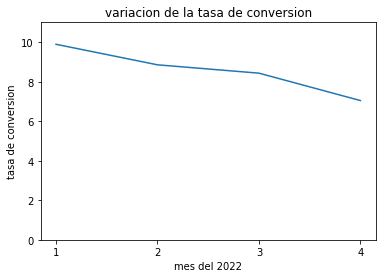

In [291]:
tasa_de_conversion.porcentaje_de_reservas.plot.line( ylim = [0, 11])
plt.title('variacion de la tasa de conversion')
plt.xlabel('mes del 2022')
plt.ylabel('tasa de conversion')
plt.xticks([1,2,3,4])
plt.show()

## Relacion entre tiempo de pantalla y reserva

In [292]:
tiempo_en_pantalla= web.groupby('user_id').agg(tiempo_total=('muinutes on screen','sum'),
                           reserva=('reserved','sum'))

In [293]:
tiempo_en_pantalla

,tiempo_total,reserva
user_id,,
104,26.866667,0.0
136,90.316667,1.0
137,37.000000,0.0
166,122.850000,0.0
201,4.483333,0.0
...,...,...
9756022,3.283333,0.0
9759725,59068.466667,0.0
9776787,1.433333,0.0


Quiero ver si el tiempo en que un usuario esta navegando en el sitio web, tiene una correlación positiva con la tasa de reserva o no.

In [294]:
def convirtio(x):
    if x > 0:
        return 1
    else:
        return 0
tiempo_en_pantalla['conversion']=tiempo_en_pantalla['reserva'].apply(convirtio)

In [295]:
tiempo_en_pantalla

,tiempo_total,reserva,conversion
user_id,,,
104,26.866667,0.0,0
136,90.316667,1.0,1
137,37.000000,0.0,0
166,122.850000,0.0,0
201,4.483333,0.0,0
...,...,...,...
9756022,3.283333,0.0,0
9759725,59068.466667,0.0,0
9776787,1.433333,0.0,0


<AxesSubplot:xlabel='tiempo_total', ylabel='reserva'>

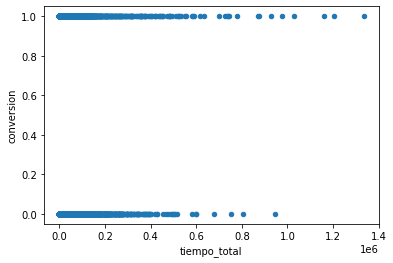

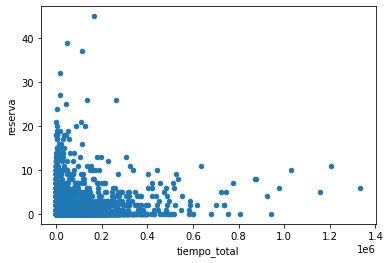

In [296]:
tiempo_en_pantalla.plot.scatter(x='tiempo_total',y='conversion')
tiempo_en_pantalla.plot.scatter(x='tiempo_total',y='reserva')

In [297]:
web.loc[:,['user_id','total_events','reserved']]

,user_id,total_events,reserved
51760,9015447,1,0.0
14885,8820027,9,0.0
3992,5510567,1,0.0
131349,8665203,9,0.0
25970,8409083,1,0.0
...,...,...,...
214144,5557797,132,0.0
214111,6220646,145,0.0
214150,5910763,235,1.0
214142,87114,184,0.0


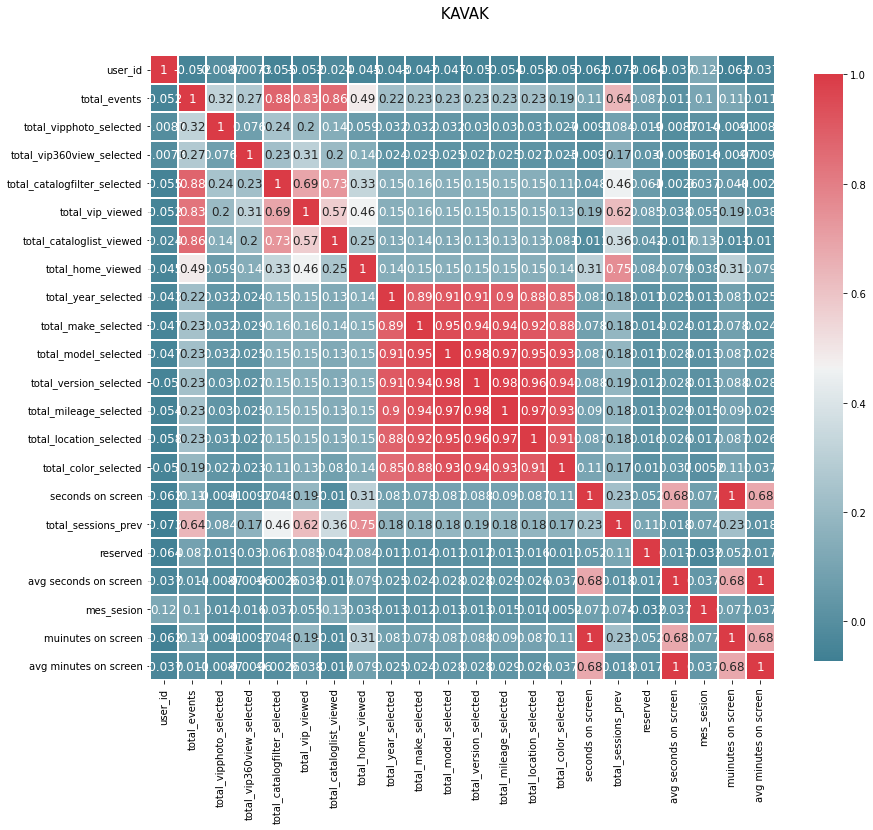

In [298]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(
        df.corr(),
        cmap = colormap,
        square=True,
        cbar_kws={'shrink':.9 },
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )

    plt.title(' KAVAK', y=1.05, size=15)

correlation_heatmap(web)

# Outliers

In [299]:
web.describe()

,user_id,total_events,total_vipphoto_selected,total_vip360view_selected,total_catalogfilter_selected,total_vip_viewed,total_cataloglist_viewed,total_home_viewed,total_year_selected,total_make_selected,...,total_mileage_selected,total_location_selected,total_color_selected,seconds on screen,total_sessions_prev,reserved,avg seconds on screen,mes_sesion,muinutes on screen,avg minutes on screen
count,2.141600e+05,214160.00000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,...,214160.000000,214160.000000,214160.000000,2.141600e+05,214160.000000,214160.00000,2.141600e+05,214160.000000,214160.000000,214160.000000
mean,7.249611e+06,136.05466,5.022619,0.549743,28.677615,25.250299,35.365283,4.779613,0.372913,0.376718,...,0.299220,0.262229,0.247086,8.518372e+04,6.660035,0.08481,9.131869e+03,2.583293,1419.728721,152.197821
std,2.521737e+06,406.15579,49.460406,5.033431,122.384672,81.485442,177.395937,22.261192,1.913053,1.884517,...,1.599664,1.538530,1.416469,6.172415e+05,14.556284,0.27860,9.233204e+04,1.011563,10287.358813,1538.867351
min,1.040000e+02,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.00000,0.000000e+00,1.000000,0.000000,0.000000
25%,5.262605e+06,12.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.920000e+02,2.000000,0.00000,7.350000e+01,2.000000,3.200000,1.225000
50%,8.741507e+06,36.00000,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.140000e+02,3.000000,0.00000,2.530000e+02,3.000000,15.233333,4.216667
75%,9.240933e+06,115.00000,0.000000,0.000000,18.000000,20.000000,14.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.426000e+03,6.000000,0.00000,6.207297e+02,3.000000,57.100000,10.345494
max,9.856417e+06,39953.00000,8286.000000,694.000000,11739.000000,6743.000000,21358.000000,2546.000000,320.000000,226.000000,...,211.000000,207.000000,213.000000,1.837662e+07,1361.000000,1.00000,5.648626e+06,4.000000,306276.933333,94143.758333


Se puede ver que hay una gran diferencia entre el cuartil 3 y el cuartil 4. Se puede pensar que los valores altos son errores del sistema o bots.Por lo tanto, voy a crear un dataframe filtado que no contenga outliers irreales.
Al haber una gran cantidad de columnas que necesitan un analisis de outliers , voy a crear una sección para cada una y analizarla antes y despues del filtrado de outlier.


In [300]:
def valor_atipico(df,var):
   outlier=df[var].quantile(0.75) + 1.5 * (df[var].quantile(0.75) - df[var].quantile(0.25))
   return int(outlier)

Tenía la idea de usar esta formula de valor outlier pero como hay muchos eventos cuyo tercer quartil es 0, voy a analizar todos los eventos juntos y aparte del resto de las variables

##Eventos

In [301]:
eventos=['total_cataloglist_viewed','total_catalogfilter_selected','total_home_viewed','total_vip360view_selected','total_color_selected','total_location_selected','total_make_selected','total_mileage_selected','total_version_selected','total_vip_viewed','total_vipphoto_selected','total_year_selected','total_model_selected']


In [302]:
eventos_estadisticas=web[[*eventos]].describe()
eventos_estadisticas

,total_cataloglist_viewed,total_catalogfilter_selected,total_home_viewed,total_vip360view_selected,total_color_selected,total_location_selected,total_make_selected,total_mileage_selected,total_version_selected,total_vip_viewed,total_vipphoto_selected,total_year_selected,total_model_selected
count,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000
mean,35.365283,28.677615,4.779613,0.549743,0.247086,0.262229,0.376718,0.299220,0.324351,25.250299,5.022619,0.372913,0.339470
std,177.395937,122.384672,22.261192,5.033431,1.416469,1.538530,1.884517,1.599664,1.657433,81.485442,49.460406,1.913053,1.705465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
75%,14.000000,18.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
max,21358.000000,11739.000000,2546.000000,694.000000,213.000000,207.000000,226.000000,211.000000,223.000000,6743.000000,8286.000000,320.000000,223.000000


In [303]:
eventos_estadisticas.loc['75%'].max()

20.0

Siendo 20 el valor mas grande de un tercer cuartil , voy a tomarlo como maximo para todos los eventos.Aquellos eventos que superen 20 interacciones no van a ser tomados en cuenta para el modelo.

In [304]:
for i in eventos:
   web=web.loc[web[i] <=20]


En el nuevo dataframe , los eventos tienen como valor maximo 20

In [305]:
web.describe()

,user_id,total_events,total_vipphoto_selected,total_vip360view_selected,total_catalogfilter_selected,total_vip_viewed,total_cataloglist_viewed,total_home_viewed,total_year_selected,total_make_selected,...,total_mileage_selected,total_location_selected,total_color_selected,seconds on screen,total_sessions_prev,reserved,avg seconds on screen,mes_sesion,muinutes on screen,avg minutes on screen
count,1.335920e+05,133592.000000,133592.000000,133592.000000,133592.000000,133592.000000,133592.000000,133592.000000,133592.000000,133592.000000,...,133592.000000,133592.000000,133592.000000,1.335920e+05,133592.000000,133592.000000,1.335920e+05,133592.000000,133592.000000,133592.000000
mean,7.383556e+06,24.294703,0.217992,0.105283,1.996684,3.755494,1.874192,0.803416,0.213067,0.210589,...,0.164606,0.135046,0.141161,2.052985e+04,3.190550,0.061920,4.947781e+03,2.470769,342.164111,82.463011
std,2.455781e+06,30.091997,1.563175,0.520052,3.807985,4.633768,4.294831,1.865288,0.770356,0.798559,...,0.654614,0.595202,0.594002,2.803831e+05,3.076556,0.241011,7.720861e+04,1.027195,4673.052181,1286.810215
min,1.360000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,5.424992e+06,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000e+01,2.000000,0.000000,3.000000e+01,2.000000,1.166667,0.500000
50%,8.793162e+06,16.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.210000e+02,2.000000,0.000000,1.169583e+02,2.000000,5.350000,1.949306
75%,9.247061e+06,32.000000,0.000000,0.000000,2.000000,6.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.580000e+02,3.000000,0.000000,2.985000e+02,3.000000,15.966667,4.975000
max,9.856417e+06,832.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,18.000000,20.000000,1.129725e+07,68.000000,1.000000,5.648626e+06,4.000000,188287.516667,94143.758333


Ahora, analizo las variables que no son eventos por separado

##Total Events

<AxesSubplot:ylabel='total_events'>

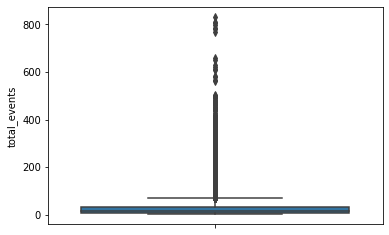

In [306]:
sns.boxplot(data = web, y = 'total_events')

In [307]:
web.total_events.value_counts()

2      10247
4       8089
1       5242
6       5133
8       4969
       ...  
302        1
628        1
444        1
400        1
564        1
Name: total_events, Length: 401, dtype: int64

In [308]:
web= web.loc[web.total_events<valor_atipico(web,'total_events')]

 calcule el valor atípico de total_events y filtre el nuevo dataset

In [309]:
web.total_events.describe()

count    126149.000000
mean         19.098629
std          16.304413
min           1.000000
25%           6.000000
50%          14.000000
75%          28.000000
max          70.000000
Name: total_events, dtype: float64

##Seconds on screen


<AxesSubplot:ylabel='seconds on screen'>

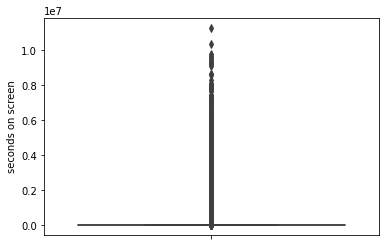

In [310]:
sns.boxplot(data=web,y='seconds on screen')

In [311]:
web['seconds on screen'].value_counts()

0.0        13133
1.0         3205
2.0         1456
3.0         1195
4.0          527
           ...  
3518.0         1
15625.0        1
4626.0         1
5285.0         1
6981.0         1
Name: seconds on screen, Length: 6456, dtype: int64

In [312]:
web['seconds on screen'].value_counts().loc[0]/len(web['seconds on screen'].value_counts())

2.0342317224287485

In [313]:
web=web.loc[web['seconds on screen']<valor_atipico(web,'seconds on screen')]

In [314]:
web['seconds on screen'].describe().round()

count    115160.0
mean        407.0
std         463.0
min           0.0
25%          47.0
50%         232.0
75%         614.0
max        1932.0
Name: seconds on screen, dtype: float64

minutes on screen deriva de seconds on screen por lo que se ajusta aca tambien

##Average seconds on screen

<AxesSubplot:ylabel='avg seconds on screen'>

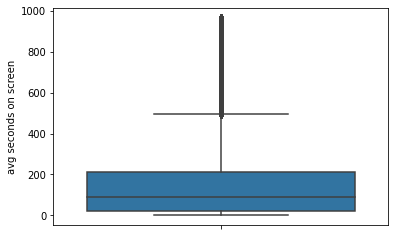

In [315]:
sns.boxplot(data=web,y='avg seconds on screen')

In [316]:
web['avg seconds on screen'].value_counts()

0.000000      13133
0.500000       3205
1.000000       1224
1.500000       1056
2.000000        491
              ...  
50.636364         1
10.625000         1
45.625000         1
129.300000        1
838.000000        1
Name: avg seconds on screen, Length: 7410, dtype: int64

In [317]:
web=web.loc[web['avg seconds on screen'] <valor_atipico(web,'seconds on screen')]

In [318]:
web['avg seconds on screen'].describe()

count    115160.000000
mean        147.087003
std         172.186467
min           0.000000
25%          21.000000
50%          88.500000
75%         210.000000
max         965.500000
Name: avg seconds on screen, dtype: float64

Lo mismo sucede con avg minutes on screen, que depende de avg seconds on screen

## Total sessions Prev

<AxesSubplot:ylabel='total_sessions_prev'>

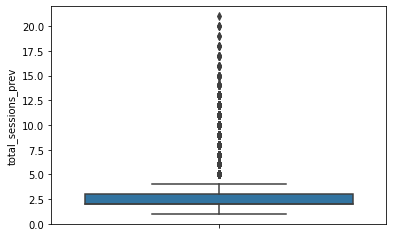

In [319]:
sns.boxplot(data=web,y='total_sessions_prev')

In [320]:
web=web.loc[web.total_sessions_prev<valor_atipico(web,'total_sessions_prev')]

In [321]:
web.total_sessions_prev.describe()

count    95227.000000
mean         2.102156
std          0.606258
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: total_sessions_prev, dtype: float64

In [322]:
print(f"Para el modelo, no se tendrán en cuenta {214160-len(web)} datos atípicos")

Para el modelo, no se tendrán en cuenta 118933 datos atípicos


#Escalado


In [323]:
def data_dist(df,var):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].set_title(f"Distribucion de {var}")
    sns.histplot(data=df, x=f"{var}", kde=True, ax=ax[0])

    ax[1].set_title(f"Boxplot de{var}")
    sns.boxplot(data=df, x=f"{var}", ax=ax[1])

##Total Events

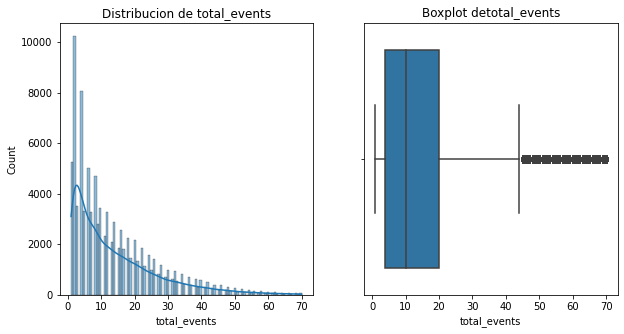

In [324]:
data_dist(web,'total_events')

Al ser una distribucion no normal, aplico minmax scaler

In [325]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_events']= minmaxscaler.fit_transform(web[['total_events']])


  ##  total Vipp Photo selected

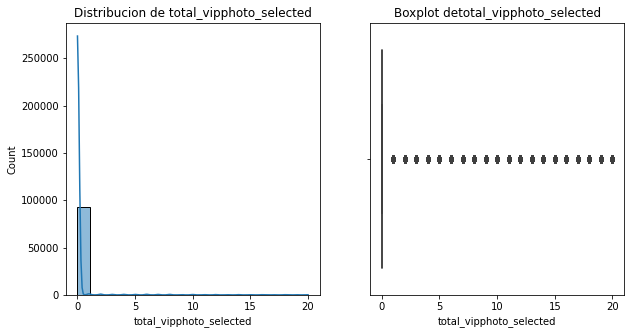

In [326]:
data_dist(web,'total_vipphoto_selected')

Al ser una distribucion no normal, aplico minmax scaler


In [327]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_vipphoto_selected']= minmaxscaler.fit_transform(web[['total_vipphoto_selected']])

##total vip360 view selected

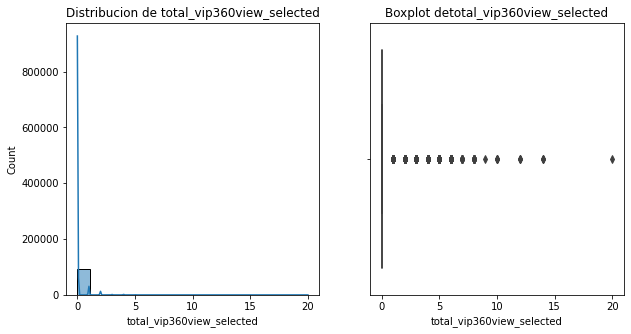

In [328]:
data_dist(web,'total_vip360view_selected')

al ser una distribución no normal, aplico minmax scaler


In [329]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_vip360view_selected']= minmaxscaler.fit_transform(web[['total_vip360view_selected']])


##total cataloglist viewed

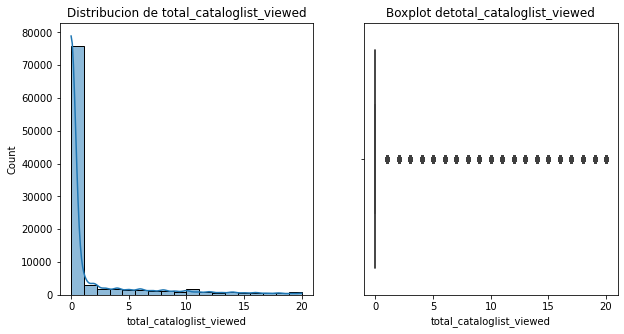

In [330]:
data_dist(web,'total_cataloglist_viewed')

al ser una distribución no normal, aplico minmax scaler

In [331]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_cataloglist_viewed']= minmaxscaler.fit_transform(web[['total_cataloglist_viewed']])

##total catalogfilter selected

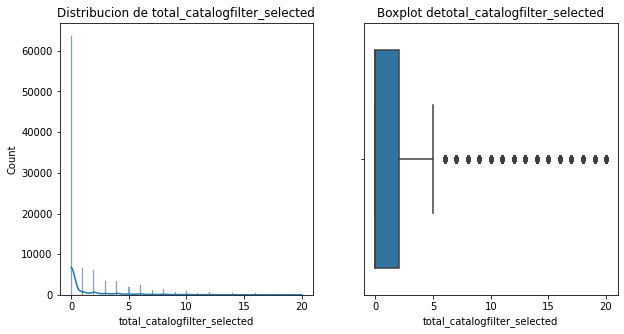

In [332]:
data_dist(web,'total_catalogfilter_selected')

al ser una distribución  no normal, aplico min max Scaler

In [333]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_catalogfilter_selected']= minmaxscaler.fit_transform(web[['total_catalogfilter_selected']])

##total home viewed

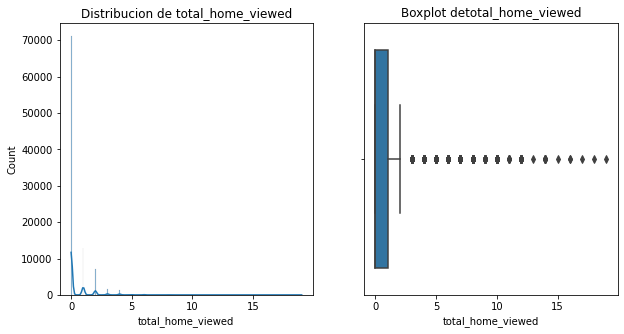

In [334]:
data_dist(web,'total_home_viewed')

Al ser una distribución que se aleja de una normal, uso minmax Scaler

In [335]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_home_viewed']= minmaxscaler.fit_transform(web[['total_home_viewed']])

##total color selected

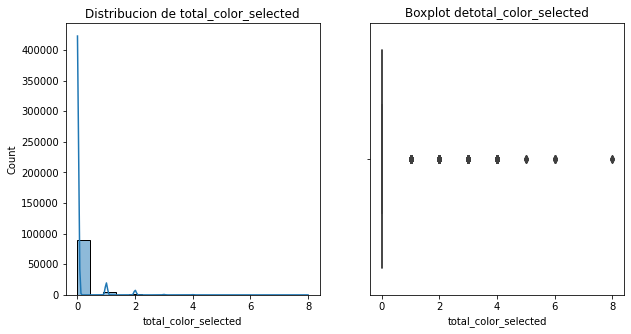

In [336]:
data_dist(web,'total_color_selected')

Al ser una distribución que se aleja de una normal, uso minmax Scaler

In [337]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_color_selected']= minmaxscaler.fit_transform(web[['total_vipphoto_selected']])

 ##total location selected

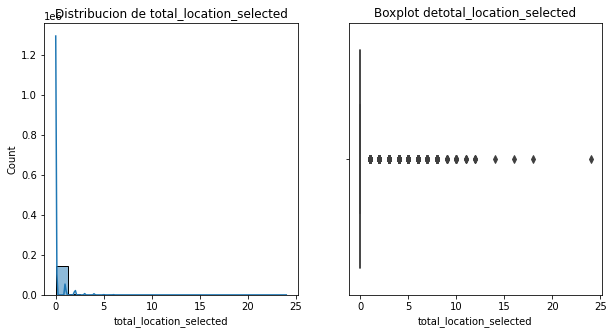

In [338]:
data_dist(web_x_outliers,'total_location_selected')

como es una distribución que se aleja de una normal , uso minmax scaler

In [339]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_location_selected']= minmaxscaler.fit_transform(web[['total_location_selected']])

##total make selected

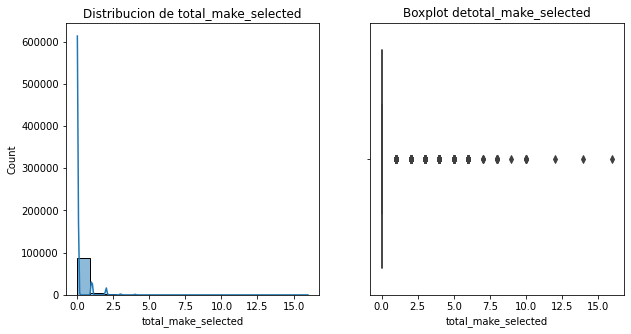

In [340]:
data_dist(web,'total_make_selected')

como es una distribucion que se aleja de una normal, uso minmax scaler

In [341]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_make_selected']= minmaxscaler.fit_transform(web[['total_make_selected']])

##total mileage selected

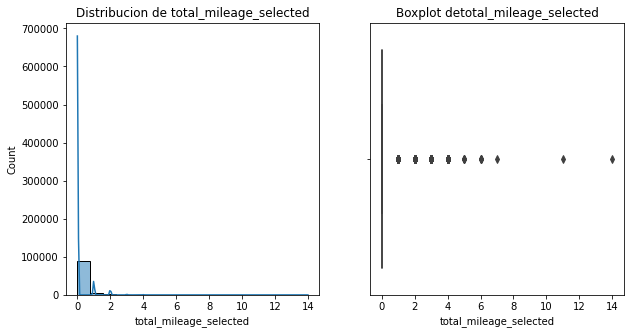

In [342]:
data_dist(web,'total_mileage_selected')

Al ser una distribución que se aleja de una normal, uso minmax scaler

In [343]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_mileage_selected']= minmaxscaler.fit_transform(web[['total_mileage_selected']])

## total version selected

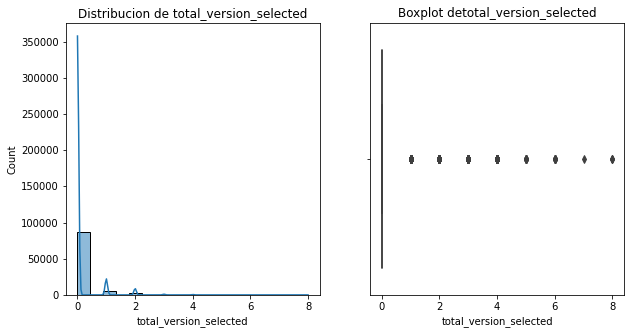

In [344]:
data_dist(web,'total_version_selected')

Al ser una distribución no normal, uso minmax scaler

In [345]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_version_selected']= minmaxscaler.fit_transform(web[['total_version_selected']])

##total vip viewed

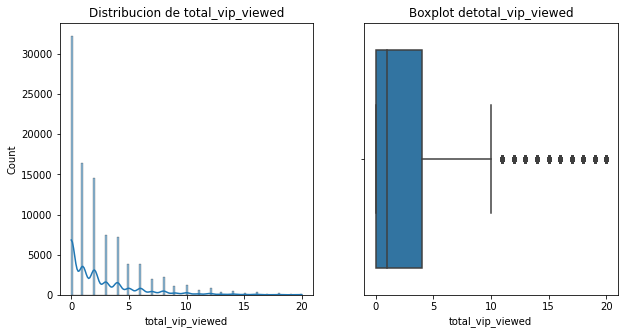

In [346]:
data_dist(web,'total_vip_viewed')

al ser una distribución que se aleja de una normal, uso minmaxscaler

In [347]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_vip_viewed']= minmaxscaler.fit_transform(web[['total_vip_viewed']])

##total year selected

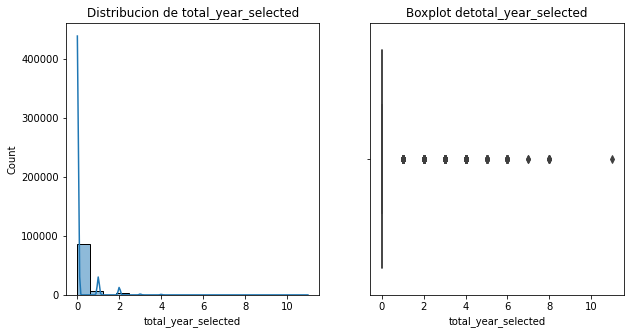

In [348]:
data_dist(web,'total_year_selected')

al ser una distribución que se aleja de una normal, uso minmaxscaler

In [349]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_year_selected']= minmaxscaler.fit_transform(web[['total_year_selected']])

##total model selected

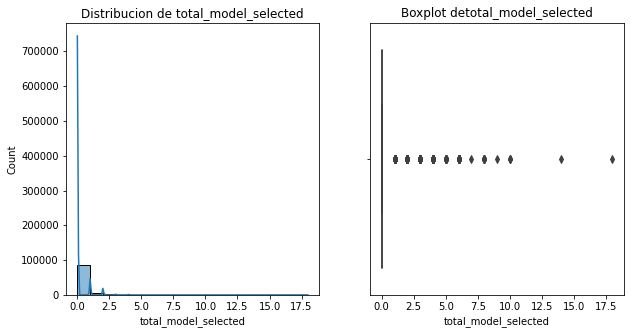

In [350]:
data_dist(web,'total_model_selected')

Al ser una distribución no normal,uso minmax scaler

In [351]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_model_selected']= minmaxscaler.fit_transform(web[['total_model_selected']])

## Seconds on Screen

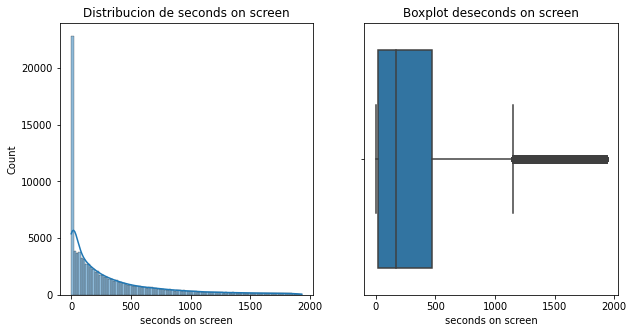

In [352]:
data_dist(web,'seconds on screen')

In [359]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['seconds on screen']= minmaxscaler.fit_transform(web[['seconds on screen']])

In [368]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['muinutes on screen']= minmaxscaler.fit_transform(web[['muinutes on screen']])

##average seconds and minutes on screen

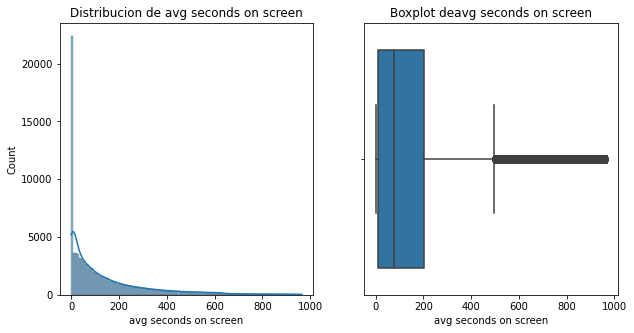

In [353]:
data_dist(web,'avg seconds on screen')

In [360]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['avg seconds on screen']= minmaxscaler.fit_transform(web[['avg minutes on screen']])

In [369]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['avg minutes on screen']= minmaxscaler.fit_transform(web[['avg minutes on screen']])

## total sessions prev

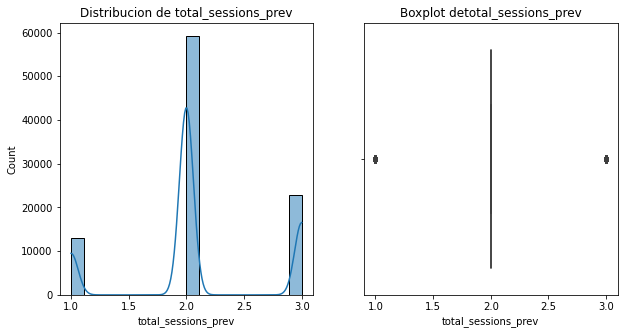

In [354]:
data_dist(web,'total_sessions_prev')

al ser una distribucíon que se aleja de la normal, uso minmax scaler

In [355]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_sessions_prev']= minmaxscaler.fit_transform(web[['total_sessions_prev']])

In [357]:
web.describe()

,user_id,total_events,total_vipphoto_selected,total_vip360view_selected,total_catalogfilter_selected,total_vip_viewed,total_cataloglist_viewed,total_home_viewed,total_year_selected,total_make_selected,...,region_San Luis Potosí,region_Sinaloa,region_Sonora,region_Tabasco,region_Tamaulipas,region_Tlaxcala,region_Veracruz,region_Yucatán,region_Zacatecas,region_nan
count,9.522700e+04,95227.000000,95227.000000,95227.000000,95227.000000,95227.000000,95227.000000,95227.000000,95227.000000,95227.000000,...,95227.000000,95227.000000,95227.000000,95227.000000,95227.000000,95227.000000,95227.000000,95227.000000,95227.000000,95227.00000
mean,7.506481e+06,0.189250,0.009921,0.003944,0.078802,0.125332,0.084576,0.024471,0.012297,0.008268,...,0.003665,0.003812,0.001586,0.003024,0.006017,0.007445,0.012601,0.003381,0.001502,0.01068
std,2.407678e+06,0.187720,0.074315,0.021408,0.162258,0.162870,0.199331,0.055381,0.043095,0.031054,...,0.060428,0.061623,0.039789,0.054911,0.077337,0.085965,0.111547,0.058052,0.038723,0.10279
min,1.360000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,5.568950e+06,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,8.845802e+06,0.130435,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,9.277715e+06,0.275362,0.000000,0.000000,0.100000,0.200000,0.000000,0.052632,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.856417e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


#Encoding

##region

In [356]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(web[['region']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
region_encoded = ohe.transform(web[['region']])

web[ohe.get_feature_names_out()] = region_encoded


web.drop(columns='region', inplace = True)
web

[array(['Aguascalientes', 'Baja California', 'Baja California Sur',
        'Campeche', 'Chiapas', 'Chihuahua', 'Coahuila', 'Colima',
        'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco',
        'Mexico City', 'Michoacán', 'Morelos', 'México', 'Nayarit', 'None',
        'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo',
        'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
        'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas', 'nan'],
       dtype=object)]

array(['region_Aguascalientes', 'region_Baja California',
       'region_Baja California Sur', 'region_Campeche', 'region_Chiapas',
       'region_Chihuahua', 'region_Coahuila', 'region_Colima',
       'region_Durango', 'region_Guanajuato', 'region_Guerrero',
       'region_Hidalgo', 'region_Jalisco', 'region_Mexico City',
       'region_Michoacán', 'region_Morelos', 'region_México',
       'region_Nayarit', 'region_None', 'region_Nuevo León',
       'region_Oaxaca', 'region_Puebla', 'region_Querétaro',
       'region_Quintana Roo', 'region_San Luis Potosí', 'region_Sinaloa',
       'region_Sonora', 'region_Tabasco', 'region_Tamaulipas',
       'region_Tlaxcala', 'region_Veracruz', 'region_Yucatán',
       'region_Zacatecas', 'region_nan'], dtype=object)

,user_id,device_id,session_id,device_model,session_date,total_events,total_vipphoto_selected,total_vip360view_selected,total_catalogfilter_selected,total_vip_viewed,...,region_San Luis Potosí,region_Sinaloa,region_Sonora,region_Tabasco,region_Tamaulipas,region_Tlaxcala,region_Veracruz,region_Yucatán,region_Zacatecas,region_nan
51760,9015447,yWOTGT6B-WzQU514Cqx1gL,1644253316189,Android,2022-02-07 17:01:56.223,0.000000,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14885,8820027,LP42_fstvBPogWjh_1bkCg,1642913715699,Android,2022-01-23 04:55:17.124,0.115942,0.0,0.0,0.25,0.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3992,5510567,AKERRpRODjl02b39AjfNb8,1642459615372,Android,2022-01-17 22:46:55.395,0.000000,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131349,8665203,SxeKxvgE3mkec-e21Ej-bm,1647229337062,Android,2022-03-14 03:42:17.095,0.115942,0.0,0.0,0.10,0.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25970,8409083,CttzrxBwYiDT93zwK93Xmt,1643398529809,Android,2022-01-28 19:35:32.308,0.000000,0.0,0.0,0.00,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214038,9450938,1159cd36-e26f-4bdc-9e29-45d5a3cbbe7f,1651358595174,hauwei,2022-04-30 22:43:15.174,0.231884,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214153,9632779,TXlKKZLYAzlCtHLJmoxIhd,1651362720693,Android,2022-04-30 23:52:00.716,0.420290,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214149,9742712,gnZqCuHQ_T6qUyQJq_7-nR,1651362520429,Android,2022-04-30 23:48:40.476,0.072464,0.0,0.0,0.00,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214075,9095105,2b9c5e85-1956-4046-97da-c338ad77bfd5,1651360143855,samsung,2022-04-30 23:09:03.855,0.492754,0.0,0.0,0.20,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Device Model

In [361]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(web[['device_model']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
device_encoded = ohe.transform(web[['device_model']])

web[ohe.get_feature_names_out()] = device_encoded


web.drop(columns='device_model', inplace = True)
web

KeyError: "None of [Index(['device_model'], dtype='object')] are in the [columns]"

#Modelo

In [371]:
web.reserved.value_counts()/len(web)*100

0.0    95.45192
1.0     4.54808
Name: reserved, dtype: float64

In [389]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = web.drop(columns=['user_id','device_id','reserved','session_date','city'])
y = web['reserved']

model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=10)
accuracy= scores.mean()

accuracy

C:\Users\Nicolas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nicolas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

0.9545192017124858

In [ ]:

from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance

model = LogisticRegression()
cv_results = cross_validate(model, X, y, cv = 5)
score = cv_results["test_score"].mean()
print(f"Antes de la permutacion, el score del model es: {round(score,2)}")


model = LogisticRegression().fit(X,y)
permutation_score = permutation_importance(model, X, y, n_repeats=100)
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T,
                            columns = ['feature','feature_importance']) 

print("Despues de la permutacion de variables, asi decrece el score en terminos de variables:")
importance_df = importance_df.sort_values(by="feature_importance", ascending = False)
importance_df